1.  Find the salary for the experience of 4.2 years and 5.2 years from the given dataset (salary_data) using simple linear regression. Train the model up to 10 iteration. And plot graph for error rate.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
error=[]
m1=[]
c1=[]
def run():
  d = pd.read_csv('/content/Salary_Data.csv')
  #print(d)
  #x=np.array(d.iloc[:,0:1])
  y=np.array(d.iloc[:,1:2])
  #normalization
  ab = np.array(d["YearsExperience"])
  ab = ab.reshape(1,len(d["YearsExperience"]))
  ab = preprocessing.normalize(ab)
  x = ab.reshape(len(d["YearsExperience"]),1)
  print(x)
  #print(len(x))
  learning_rate = 0.003
  initial_c = 1 
  initial_m = 1 
  num_iterations = 10
  compute_error(initial_c, initial_m,x,y)
  gradient_descent_runner(x,y, initial_c, initial_m, learning_rate, num_iterations)
    
def compute_error(c, m, x,y):
    totalError = 0
    x = x
    y = y
    m1.append(m)
    c1.append(c)
    for i in range(0,len(x)):
      totalError+=(((m * x[i] + c)-y[i]) ** 2)

    
    error.append(totalError/len(x))

def step_gradient(c_current, m_current, x,y, learningRate):
    c_gradient = 0.0
    m_gradient = 0.0
    N = float(len(x))
    x = x
    y = y
    cg=[]
    mg=[]
    for i in range(0,len(x)):
      cg.append(((m_current * x[i]) + c_current)-y[i])
      mg.append(x[i] * (((m_current * x) + c_current)-y[i]))
    c_gradient=(np.array(cg).sum())/N
    m_gradient=(np.array(mg).sum())/N
    new_c = c_current - (learningRate * c_gradient)
    new_m = m_current - (learningRate * m_gradient)
    compute_error(new_c,new_m,x,y)
    return [new_c, new_m]

def gradient_descent_runner(x,y, starting_c, starting_m, learning_rate, num_iterations):
    c = starting_c
    m = starting_m
    for i in range(num_iterations):
      c,m=step_gradient(c, m, x,y, learning_rate)
   
run()


[array([6.50277422e+09]), array([6.43035548e+09]), array([6.35872889e+09]), array([6.28788589e+09]), array([6.21781802e+09]), array([6.14851691e+09]), array([6.07997428e+09]), array([6.01218194e+09]), array([5.94513179e+09]), array([5.8788158e+09]), array([5.81322604e+09])]
12788.394019587553 2222.589906649616


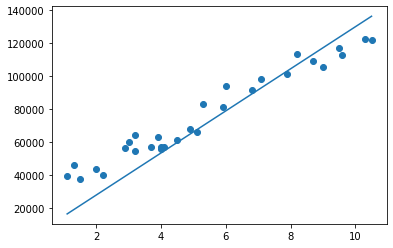

In [132]:
plt.scatter(x,y)
e=np.array(error)
print(error)
e1=min(e)
#print(error.index(e1))
print(m1[error.index(e1)],c1[error.index(e1)])
p=[]
for i in range(0,len(x)):
  p.append(m1[error.index(e1)]*x[i]+c1[error.index(e1)])
plt.plot(x,p)

11


Text(0, 0.5, 'Error')

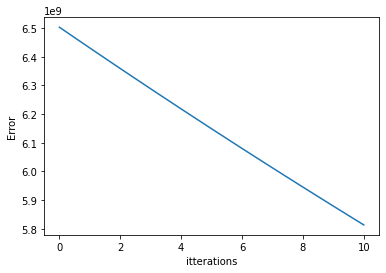

In [133]:
a=np.arange(0,11)
print(len(error))
plt.plot(a,error)
plt.xlabel("itterations")
plt.ylabel("Error")

In [134]:
ye1 = m1[error.index(e1)]*4.2+c1[error.index(e1)]
ye2 = m1[error.index(e1)]*5.2+c1[error.index(e1)]
print("Salary for the experience of 4.2 years : ",ye1)
print("Salary for the experience of 5.2 years : ",ye2)

Salary for the experience of 4.2 years :  55933.84478891734
Salary for the experience of 5.2 years :  68722.2388085049
